# <center> Vehicle Fraud Detection <center>

### by Tham Xiang Cong
5 September 2022

dataset from: https://www.kaggle.com/datasets/khusheekapoor/vehicle-insurance-fraud-detection

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Exploring and cleaning of data

In [3]:
# Import dataset into Jupyter Notebook
df= pd.read_csv('carclaims.csv')

In [4]:
df.describe

<bound method NDFrame.describe of       Month  WeekOfMonth  DayOfWeek     Make AccidentArea DayOfWeekClaimed  \
0       Dec            5  Wednesday    Honda        Urban          Tuesday   
1       Jan            3  Wednesday    Honda        Urban           Monday   
2       Oct            5     Friday    Honda        Urban         Thursday   
3       Jun            2   Saturday   Toyota        Rural           Friday   
4       Jan            5     Monday    Honda        Urban          Tuesday   
...     ...          ...        ...      ...          ...              ...   
15415   Nov            4     Friday   Toyota        Urban          Tuesday   
15416   Nov            5   Thursday  Pontiac        Urban           Friday   
15417   Nov            5   Thursday   Toyota        Rural           Friday   
15418   Dec            1     Monday   Toyota        Urban         Thursday   
15419   Dec            2  Wednesday   Toyota        Urban         Thursday   

      MonthClaimed  WeekOfMon

In [5]:
df.shape

(15420, 33)

In [6]:
# Checking of NA
df.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64

array([[<AxesSubplot:title={'center':'WeekOfMonth'}>,
        <AxesSubplot:title={'center':'WeekOfMonthClaimed'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'PolicyNumber'}>,
        <AxesSubplot:title={'center':'RepNumber'}>,
        <AxesSubplot:title={'center':'Deductible'}>],
       [<AxesSubplot:title={'center':'DriverRating'}>,
        <AxesSubplot:title={'center':'Year'}>, <AxesSubplot:>]],
      dtype=object)

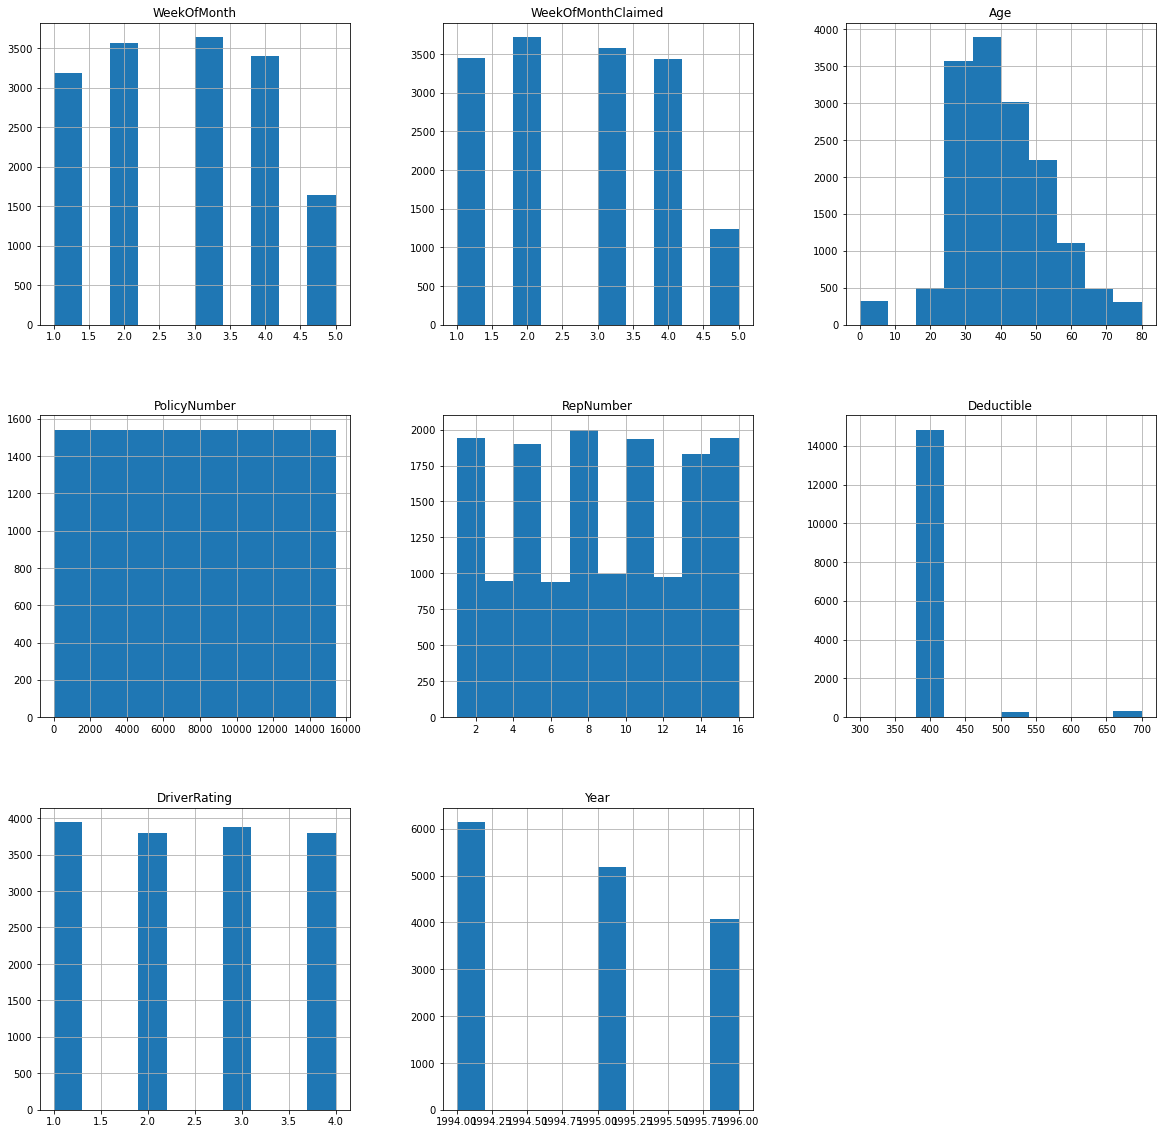

In [7]:
df.hist(figsize=(20,20))

I noted that there is an outlier in "Age". Let's explore further.

In [8]:
df['Age'].describe()

count    15420.000000
mean        39.855707
std         13.492377
min          0.000000
25%         31.000000
50%         38.000000
75%         48.000000
max         80.000000
Name: Age, dtype: float64

There were people who registered their age as 0. It is impossible for drivers to be age 0. Let's explore further.

In [9]:
# How many people with "Age" 0?
print(df.groupby('Age').count())

     Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
Age                                                                        
0      320          320        320   320           320               320   
16       9            9          9     9             9                 9   
17       6            6          6     6             6                 6   
18      48           48         48    48            48                48   
19      32           32         32    32            32                32   
..     ...          ...        ...   ...           ...               ...   
76      42           42         42    42            42                42   
77      29           29         29    29            29                29   
78      35           35         35    35            35                35   
79      20           20         20    20            20                20   
80      32           32         32    32            32                32   

     MonthC

In [10]:
# Replace '0' with median score of '38'
df['Age'] = df['Age'].replace([0], 38)

Median, instead of mean, is used because "Age" is a non-parametric variable (ie it is right-skewed according to the histogram)

In [11]:
# Double checking the elements in "Age" after replacement
df['Age'].describe()

count    15420.000000
mean        40.644293
std         12.187171
min         16.000000
25%         31.000000
50%         38.000000
75%         48.000000
max         80.000000
Name: Age, dtype: float64

array([[<AxesSubplot:title={'center':'WeekOfMonth'}>,
        <AxesSubplot:title={'center':'WeekOfMonthClaimed'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'PolicyNumber'}>,
        <AxesSubplot:title={'center':'RepNumber'}>,
        <AxesSubplot:title={'center':'Deductible'}>],
       [<AxesSubplot:title={'center':'DriverRating'}>,
        <AxesSubplot:title={'center':'Year'}>, <AxesSubplot:>]],
      dtype=object)

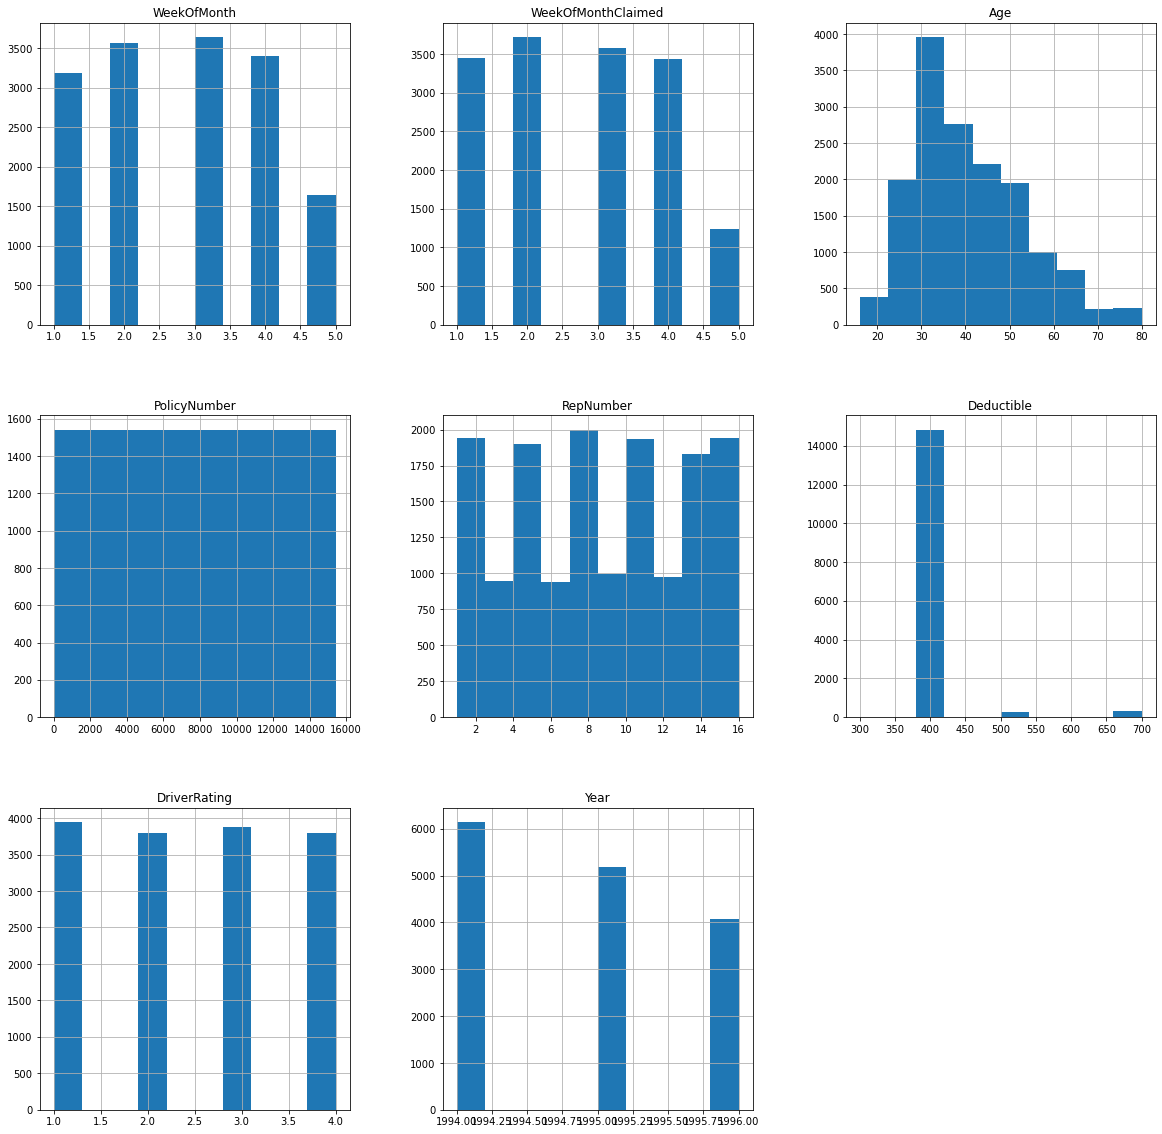

In [12]:
# Let's visualise "Age" again
df.hist(figsize=(20,20))

In [13]:
# Let's confirm that the data frame is intact
df.shape

(15420, 33)

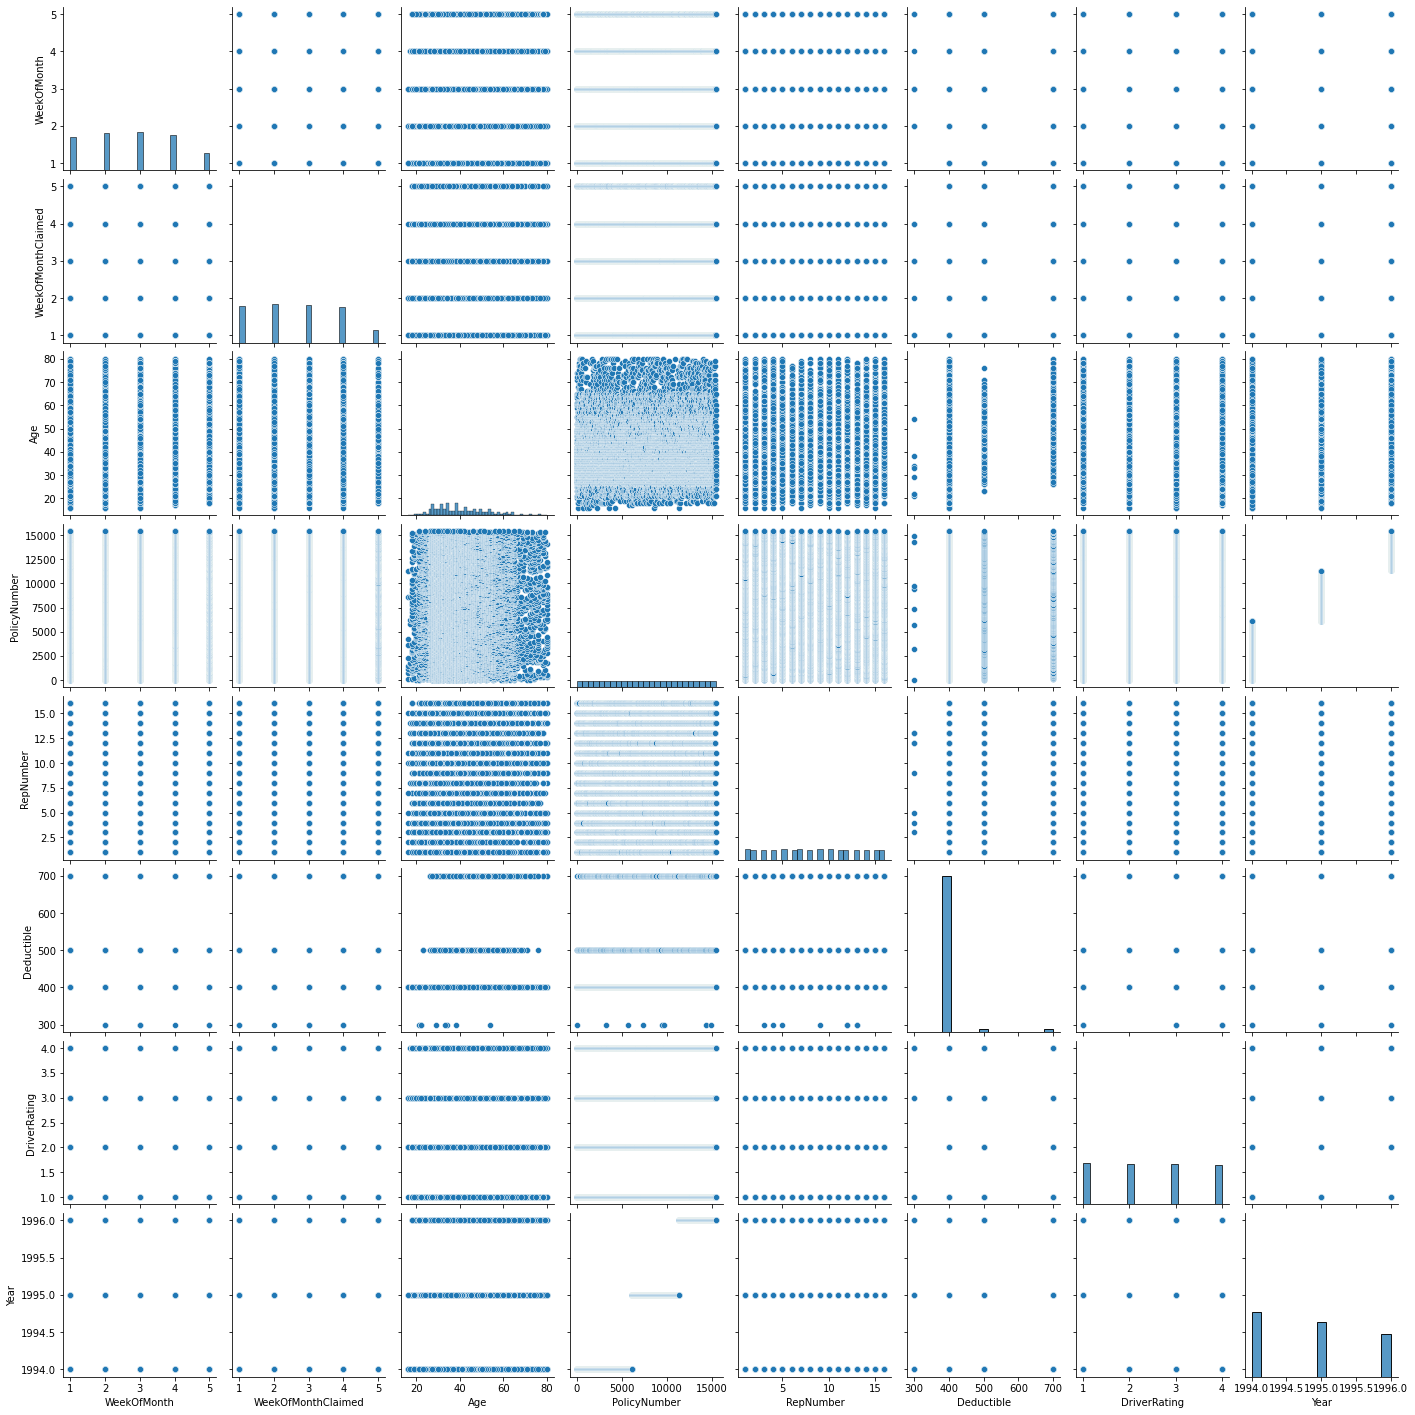

In [14]:
# Let's visualise the data using pairplot
sns.pairplot(df)

<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'Fraud Cases')

([<matplotlib.patches.Wedge at 0x7ff749655610>,
 [Text(-1.0806082659262382, 0.20563505443354999, 'No'),
  Text(1.1788453941374464, -0.22432908130897658, 'Yes')],
 [Text(-0.5894226905052207, 0.11216457514557271, '94.0%'),
  Text(0.6876598132468436, -0.13085863076356966, '6.0%')])

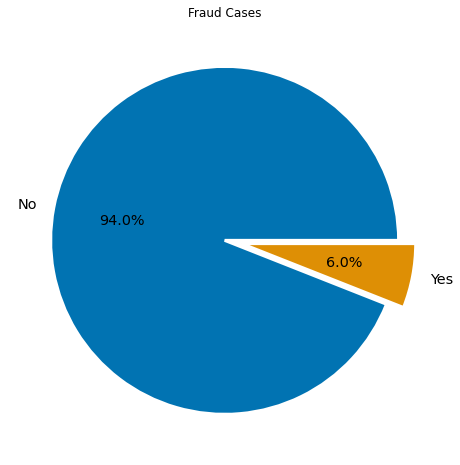

In [15]:
# Visualisation of fraud cases in a piechart
colors = sns.color_palette('colorblind')
explode = (0, 0.1)
plt.figure(figsize=(10,8))
plt.title('Fraud Cases')
plt.pie(df.FraudFound.value_counts().values, labels = df.FraudFound.value_counts().index, colors = colors, explode = explode, autopct= '%.1f%%', 
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, 
        textprops={'size': 'x-large'})
plt.show()

It can be noted that the number of fraud cases is way lesser than those with no fraud cases; there is an imbalance in the data.

In [16]:
# Describe dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [17]:
# Checking of elements in the column
df['BasePolicy'].value_counts()

Collision     5962
Liability     5009
All Perils    4449
Name: BasePolicy, dtype: int64

In [18]:
# Mapping of strings to numerical values [25 objects]
#1 
df['Month'] = df['Month'].map({'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12})
#2
df['MonthClaimed'] = df['MonthClaimed'].map({'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12})
#3
df['DayOfWeek'] = df['DayOfWeek'].map({'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7})
#4
df['DayOfWeekClaimed'] = df['DayOfWeekClaimed'].map({'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7})
#5
df['Make'] = df['Make'].map({'Pontiac':1, 'Toyota':2, 'Honda':3, 'Mazda':4, 'Chevrolet': 5, 'Accura':6, 'Ford':7, 'VW':8, 'Dodge':9, 'Saab':10, 'Mercury':11, 'Saturn': 12, 'Nisson':13, 'BMW':14, 'Jaguar':15, 'Porche':16, 'Mecedes':17, 'Ferrari':18, 'Lexus':19})
#6
df['AccidentArea'] = df['AccidentArea'].map({'Urban':1, 'Rural':2})
#7
df['Sex'] = df['Sex'].map({'Male':1, 'Female':2})
#8
df['MaritalStatus'] = df['MaritalStatus'].map({'Married':1, 'Single':2, 'Divorced':3, 'Widow':4})
#9
df['Fault'] = df['Fault'].map({'Policy Holder': 1, 'Third Party':2})
#10
df['PolicyType'] = df['PolicyType'].map({'Sedan - Collision':1, 'Sedan - Liability':2, 'Sedan - All Perils':3, 'Sport - Collision':4, 'Utility - All Perils':5, 'Utility - Collision':6, 'Sport - All Perils':7, 'Utility - Liability':8, 'Sport - Liability':9})
#11
df['VehicleCategory'] = df['VehicleCategory'].map({'Sedan': 1, 'Sport':2, 'Utility':3})
#12
df['VehiclePrice'] = df['VehiclePrice'].map({'less than 20,000':1, '20,000 to 29,000':2, '30,000 to 39,000':3, '40,000 to 59,000':4, '60,000 to 69,000':5, 'more than 69,000':6})
#13
df['Days:Policy-Accident'] = df['Days:Policy-Accident'].map({'none':1, '1 to 7':2, '8 to 15':3, '15 to 30':4, 'more than 30':5})
#14
df['Days:Policy-Claim'] = df['Days:Policy-Claim'].map({'none':1, '8 to 15':2, '15 to 30':3, 'more than 30':4})
#15
df['PastNumberOfClaims'] = df['PastNumberOfClaims'].map({'none':1, '1':2, '2 to 4':3, 'more than 4':4})
#16
df['AgeOfVehicle'] = df['AgeOfVehicle'].map({'new':1, '2 years':2, '3 years':3, '4 years':4, '5 years':5, '6 years':6, '7 years':7, 'more than 7':8})
#17
df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].map({'16 to 17':1, '18 to 20':2, '21 to 25':3, '26 to 30':4, '31 to 35':5, '36 to 40':6, '41 to 50':7, '51 to 65':8, 'over 65':9})
#18
df['PoliceReportFiled'] = df['PoliceReportFiled'].map({'Yes':1, 'No':0})
#19
df['WitnessPresent'] = df['WitnessPresent'].map({'Yes':1, 'No':0})
#20
df['AgentType'] = df['AgentType'].map({'External':1, 'Internal':2})
#21
df['NumberOfSuppliments'] = df['NumberOfSuppliments'].map({'none':1, '1 to 2':2, '3 to 5':3, 'more than 5':4})
#22
df['AddressChange-Claim'] = df['AddressChange-Claim'].map({'no change':1, 'under 6 months':2, '1 year':3, '2 to 3 years':4, '4 to 8 years':5})
#23
df['NumberOfCars'] = df['NumberOfCars'].map({'1 vehicle':1, '2 vehicles':2, '3 to 4':3, '5 to 8':4, 'more than 8':5})
#24
df['BasePolicy'] = df['BasePolicy'].map({'Collision': 1, 'Liability':2, 'All Perils':3})
#25
df['FraudFound'] = df['FraudFound'].map({'Yes':1, 'No':0})

In [19]:
# Let's confirm if the 'object's have been successfully mapped
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,12,5,3,3,1,2.0,1.0,1,2,2,...,4,0,0,1,1,3,3,1994,2,0
1,1,3,3,3,1,1.0,1.0,4,1,2,...,5,1,0,1,1,1,1,1994,1,0
2,10,5,5,3,1,4.0,11.0,2,1,1,...,7,0,0,1,1,1,1,1994,1,0
3,6,2,6,2,2,5.0,7.0,1,1,1,...,8,1,0,1,4,1,1,1994,2,0
4,1,5,1,3,1,2.0,2.0,2,2,2,...,5,0,0,1,1,1,1,1994,1,0


In [20]:
# Drop the columns for 'PolicyNumber' and 'RepNumber' as they are identifiers
df.drop(columns=['PolicyNumber', 'RepNumber'], axis =1, inplace = True)

In [21]:
# Double checking if the two columns have been dropped
df.shape

(15420, 31)

In [22]:
df.corr()

# I have attempted to visualise the correlation in a heatmap, using the following code:

#sns.heatmap(df, vmin=-1, vmax=1, cmap= 'YlGnBu', center=0, annot=True)

#However, error was given as there are too many columns, hence, can't use visualisation.

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
Month,1.000000,0.031442,0.000968,-0.009086,-0.002140,-0.006625,0.833637,0.053917,0.007397,-0.008721,...,0.017872,0.047896,-0.001515,0.023576,0.026952,0.000117,-0.009396,0.048852,-0.032054,-0.027278
WeekOfMonth,0.031442,1.000000,-0.013370,-0.006353,-0.009116,0.009937,0.013844,0.275400,-0.005314,0.014726,...,-0.002758,0.013026,0.013713,0.006477,0.000995,-0.002860,0.002521,-0.003906,0.007664,-0.011861
DayOfWeek,0.000968,-0.013370,1.000000,-0.018217,0.025699,-0.057082,-0.004029,0.004716,-0.000990,0.017573,...,-0.001087,0.015406,0.004251,0.003516,-0.002267,0.008440,-0.008302,0.007275,-0.015251,0.017452
Make,-0.009086,-0.006353,-0.018217,1.000000,0.015811,0.016296,-0.000918,-0.002684,-0.037141,-0.035120,...,0.041621,0.001606,-0.013586,0.022965,0.005996,0.003054,0.009040,-0.007996,0.016789,0.012997
AccidentArea,-0.002140,-0.009116,0.025699,0.015811,1.000000,-0.010975,0.003434,-0.006584,-0.033804,-0.005218,...,-0.007964,-0.001754,0.028362,0.005189,0.018871,0.014495,0.007805,-0.002284,-0.013095,0.033499
DayOfWeekClaimed,-0.006625,0.009937,-0.057082,0.016296,-0.010975,1.000000,0.010821,-0.030071,-0.004626,-0.010109,...,0.002967,-0.011015,-0.002425,0.005884,0.002901,0.000842,0.003552,0.002990,0.014943,0.007974
MonthClaimed,0.833637,0.013844,-0.004029,-0.000918,0.003434,0.010821,1.000000,0.057397,0.010658,-0.007900,...,0.036663,0.056710,0.001012,0.032030,0.036888,-0.000266,-0.004253,0.053337,-0.044337,-0.028982
WeekOfMonthClaimed,0.053917,0.275400,0.004716,-0.002684,-0.006584,-0.030071,0.057397,1.000000,-0.003739,-0.003870,...,0.001397,0.023510,0.009369,-0.011314,0.012062,0.009606,0.008246,0.012175,0.004607,-0.005761
Sex,0.007397,-0.005314,-0.000990,-0.037141,-0.033804,-0.004626,0.010658,-0.003739,1.000000,0.147945,...,-0.065444,0.007413,0.005585,-0.012681,-0.010329,0.003346,-0.000081,-0.000413,-0.027657,-0.029953
MaritalStatus,-0.008721,0.014726,0.017573,-0.035120,-0.005218,-0.010109,-0.007900,-0.003870,0.147945,1.000000,...,-0.431423,0.011138,0.012556,0.005085,-0.032605,-0.000839,-0.002525,-0.010723,-0.040979,-0.001533


In [23]:
# Checking for variables with high correlations [defined as r more than 0.7]
correlation_mat = df.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
print(sorted_pairs)
print("")
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.7]
print(strong_pairs)

AgeOfPolicyHolder    MaritalStatus         -0.431423
MaritalStatus        AgeOfPolicyHolder     -0.431423
                     AgeOfVehicle          -0.408311
AgeOfVehicle         MaritalStatus         -0.408311
Age                  MaritalStatus         -0.368488
                                              ...   
NumberOfSuppliments  NumberOfSuppliments    1.000000
AddressChange-Claim  AddressChange-Claim    1.000000
NumberOfCars         NumberOfCars           1.000000
VehiclePrice         VehiclePrice           1.000000
FraudFound           FraudFound             1.000000
Length: 961, dtype: float64

AgeOfVehicle          AgeOfPolicyHolder       0.743915
AgeOfPolicyHolder     AgeOfVehicle            0.743915
BasePolicy            PolicyType              0.785248
PolicyType            BasePolicy              0.785248
Month                 MonthClaimed            0.833637
MonthClaimed          Month                   0.833637
AgeOfPolicyHolder     Age                     0.848918
Age

From the correlation table as displayed above, it can be noted that:
- There are no variables that have strong inverse relationship (r less than -0.7).
- The following relationships have strong relationships with each other:
-- AgeOfVehicle          -- AgeOfPolicyHolder       -- 0.743915
-- AgeOfPolicyHolder     -- AgeOfVehicle            -- 0.743915
-- BasePolicy            -- PolicyType              -- 0.785248
-- PolicyType            -- BasePolicy              -- 0.785248
-- Month                 -- MonthClaimed            -- 0.833637
-- MonthClaimed          -- Month                   -- 0.833637
-- AgeOfPolicyHolder     -- Age                     -- 0.848918
-- Age                   -- AgeOfPolicyHolder       -- 0.848918
- "Age" and "Age of Policy Holder" are synonyms, hence, I will be removing "Age". "Age" is removed as I have replace the "0" with median age of "38". "Age of Policy Holder" is a better reflection of the dataset.

In [24]:
# Drop the columns for "Age"
df.drop(columns=['Age'], axis =1, inplace = True)

In [25]:
# Double checking if "Age" has been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15420 non-null  int64  
 1   WeekOfMonth           15420 non-null  int64  
 2   DayOfWeek             15420 non-null  int64  
 3   Make                  15420 non-null  int64  
 4   AccidentArea          15420 non-null  int64  
 5   DayOfWeekClaimed      15419 non-null  float64
 6   MonthClaimed          15419 non-null  float64
 7   WeekOfMonthClaimed    15420 non-null  int64  
 8   Sex                   15420 non-null  int64  
 9   MaritalStatus         15420 non-null  int64  
 10  Fault                 15420 non-null  int64  
 11  PolicyType            15420 non-null  int64  
 12  VehicleCategory       15420 non-null  int64  
 13  VehiclePrice          15420 non-null  int64  
 14  Deductible            15420 non-null  int64  
 15  DriverRating       

## Model 1: Logistic Regression

In [26]:
#Import library

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [27]:
# Define X and y
X = df.drop(columns = ['FraudFound'], axis = 1) #I want all variables to be included except for "FraudFound" as it is a target
y = df['FraudFound']

X.shape
y.shape

(15420, 29)

(15420,)

In [28]:
# Initialize logistic regression model
lr = LogisticRegression()

In [29]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
# Checking of shapes of X_train, X_test, y_train, y_test
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(11565, 29)

(3855, 29)

(11565,)

(3855,)

In [31]:
# Fit X_train and y_train
lr.fit(X_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Noted that there is an error as noted by "ValueError: Input X contains NaN."

In [32]:
# Checking of NA as there is an error
df.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        1
MonthClaimed            1
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64

In [33]:
# Drop row(s) that display Null values
df = df.dropna()
df.shape

(15419, 30)

Only one row is removed.

In [34]:
# Redefine X and y
X = df.drop(columns = ['FraudFound'], axis = 1) #I want all variables to be included except for "FraudFound" as it is a target
y = df['FraudFound']
# Initialize logistic regression model
lr = LogisticRegression()
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)
# Fit X_train and y_train
lr.fit(X_train, y_train)
# Use model to predict X_test
y_pred = lr.predict(X_test)
# Compare predictions to y_test
accuracy_score(y_test, y_pred)

/Users/thamxiangcong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

0.9457846952010376

MinMax scaling done because of the limitations of iterations as displayed above: "STOP: TOTAL NO. of ITERATIONS REACHED LIMIT."

In [35]:
# Initialize MinMaxScalar
scaler = MinMaxScaler()

# Fit X
X_normal = scaler.fit_transform(X)
X = pd.DataFrame(X_normal)

# Checking of trasformed X
X.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.000000,1.00,0.333333,0.111111,0.0,0.166667,0.000000,0.00,1.0,0.333333,...,0.285714,0.375,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.5
1,0.000000,0.50,0.333333,0.111111,0.0,0.000000,0.000000,0.75,0.0,0.333333,...,0.714286,0.500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.818182,1.00,0.666667,0.111111,0.0,0.500000,0.909091,0.25,0.0,0.000000,...,0.857143,0.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.454545,0.25,0.833333,0.055556,1.0,0.666667,0.545455,0.00,0.0,0.000000,...,1.000000,0.875,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5
4,0.000000,1.00,0.000000,0.111111,0.0,0.166667,0.090909,0.25,1.0,0.333333,...,0.571429,0.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Initialize logistic regression model
lr = LogisticRegression()
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)
# Fit X_train and y_train
result = lr.fit(X_train, y_train)
# Use model to predict X_test
y_pred = lr.predict(X_test)
# Compare predictions to y_test
accuracy_score(y_test, y_pred)

0.938780804150454

### Confusion Matrix

In [37]:
# import library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

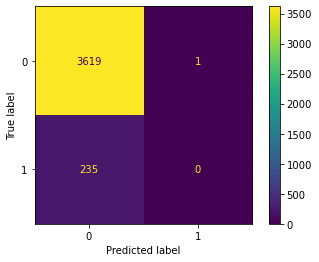

In [38]:
cm = confusion_matrix(y_test, y_pred) # calculate

cm_display = ConfusionMatrixDisplay(cm).plot() # visualize

In [39]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [40]:
# Calculate precision, recall and f1 score
precision = precision_score(y_test, y_pred)
print(f'precision = {precision}')
recall = recall_score(y_test, y_pred)
print(f'recall = {recall}')
f1 = f1_score(y_test, y_pred)
print(f'f1 = {f1}')

precision = 0.0
recall = 0.0
f1 = 0.0


### Receiver operating characteristic curve (ROC)

In [41]:
# Import library

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

array([0.01660417, 0.01133473, 0.01081734, ..., 0.05550386, 0.01002807,
       0.20123308])

AUC score:  0.769174797225814


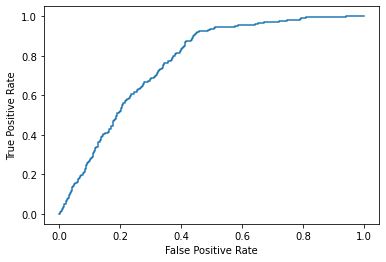

In [42]:
y_score = lr.predict_proba(X_test)[:,1] 
y_score

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=lr.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

print('AUC score: ',roc_auc_score(y_test,lr.predict_proba(X_test)[:,1])) 

## Model 2: K Nearest Neighbors

In [43]:
# Import library

from sklearn.neighbors import KNeighborsClassifier

In [44]:
# Initialize K nearest neighbors
knn = KNeighborsClassifier()
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)
# Fit X_train and y_train
knn.fit(X_train, y_train)
# Use model to predict X_test
y_pred = knn.predict(X_test)
# Compare predictions to y_test
accuracy_score(y_test, y_pred)

KNeighborsClassifier()

0.9359273670557717

### Confusion Matrix

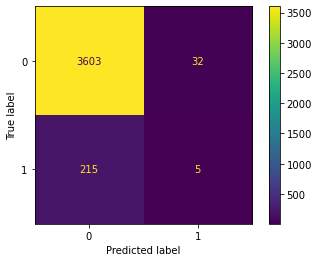

In [45]:
cm = confusion_matrix(y_test, y_pred) # calculate

cm_display = ConfusionMatrixDisplay(cm).plot() # visualize

In [46]:
# Calculate precision, recall and f1 score
precision = precision_score(y_test, y_pred)
print(f'precision = {precision}')
recall = recall_score(y_test, y_pred)
print(f'recall = {recall}')
f1 = f1_score(y_test, y_pred)
print(f'f1 = {f1}')

precision = 0.13513513513513514
recall = 0.022727272727272728
f1 = 0.038910505836575876


### Receiver operating characteristic curve (ROC)

array([0. , 0. , 0. , ..., 0.4, 0. , 0. ])

AUC score:  0.6248730774040265


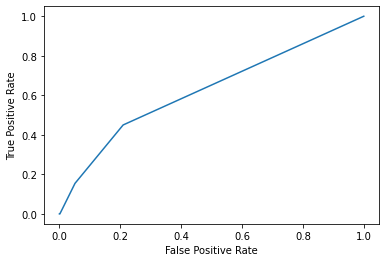

In [47]:
y_score = knn.predict_proba(X_test)[:,1]
y_score

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=knn.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

print('AUC score: ',roc_auc_score(y_test,knn.predict_proba(X_test)[:,1])) 

## Model 3: Decision Tree

In [48]:
# Import library

from sklearn.tree import DecisionTreeClassifier

In [49]:
# Initialize Decision Tree
dt = DecisionTreeClassifier()
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)
# Fit X_train and y_train
dt.fit(X_train, y_train)
# Use model to predict X_test
y_pred = dt.predict(X_test)
# Compare predictions to y_test
accuracy_score(y_test, y_pred)

DecisionTreeClassifier()

0.8941634241245137

### Confusion Matrix

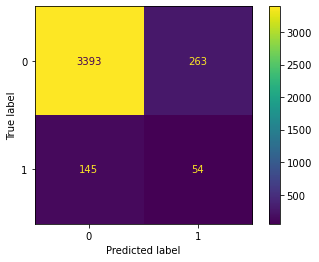

In [50]:
cm = confusion_matrix(y_test, y_pred) # calculate

cm_display = ConfusionMatrixDisplay(cm).plot() # visualize

In [51]:
# Calculate precision, recall and f1 score
precision = precision_score(y_test, y_pred)
print(f'precision = {precision}')
recall = recall_score(y_test, y_pred)
print(f'recall = {recall}')
f1 = f1_score(y_test, y_pred)
print(f'f1 = {f1}')

precision = 0.17034700315457413
recall = 0.271356783919598
f1 = 0.20930232558139533


### Receiver operating characteristic curve (ROC)

array([0., 0., 0., ..., 1., 0., 0.])

AUC score:  0.599710120625007


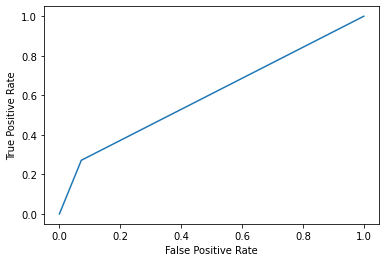

In [52]:
y_score = dt.predict_proba(X_test)[:,1]
y_score

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=dt.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

print('AUC score: ',roc_auc_score(y_test,dt.predict_proba(X_test)[:,1])) 

### Comparison of three models using ROC curve

LogisticRegression()

KNeighborsClassifier()

DecisionTreeClassifier()

Text(0.5, 1.0, 'ROC curve')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive rate')

Logistic Regression is 0.766085625061852 K Nearest Neigbors is 0.6664614098941095 Decision Trees is 0.595915848388551


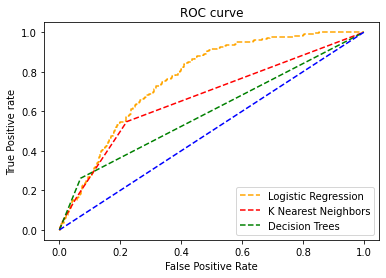

In [53]:
# Fit Log Reg, K Nearest Neighbors,, Decision Trees models
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Predict probabilities
pred_prob1 = lr.predict_proba(X_test)
pred_prob2 = knn.predict_proba(X_test)
pred_prob3 = dt.predict_proba(X_test)

# Roc curve for the models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# Roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# Plotting graph 
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='K Nearest Neighbors')
plt.plot(fpr3, tpr3, linestyle='--',color='green', label='Decision Trees')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.legend()
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])

print(f'Logistic Regression is {auc_score1}', f'K Nearest Neigbors is {auc_score2}', f'Decision Trees is {auc_score3}')

Logistic regression displays the highest AUC score compared to the two other models. However, the precision, recall and f1 scores in the logistic regression are zero, which indicates a highly imbalanced sample. I will use undersampling technique and then re-fit the data into the three models again.

## Undersample the dataset

In [54]:
# Import libraries

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [55]:
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

# Double checking if transformation has taken place
y_rus

original dataset shape: Counter({0: 14496, 1: 923})
Resample dataset shape Counter({0: 923, 1: 923})


0       0
1       0
2       0
3       0
4       0
       ..
1841    1
1842    1
1843    1
1844    1
1845    1
Name: FraudFound, Length: 1846, dtype: int64

### Fit the transformed x and y values into Logistic Regression Model

In [56]:
# Initialize logistic regression model
lr = LogisticRegression()
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus)
# Fit X_train and y_train
lr.fit(X_train, y_train)
# Use model to predict X_test
y_pred = lr.predict(X_test)
# Compare predictions to y_test
accuracy_score(y_test, y_pred)

LogisticRegression()

0.70995670995671

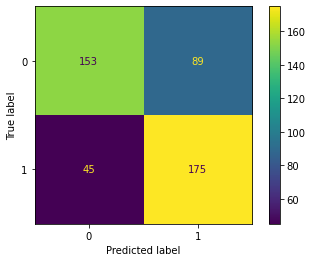

In [57]:
cm = confusion_matrix(y_test, y_pred) # calculate

cm_display = ConfusionMatrixDisplay(cm).plot() # visualize

In [58]:
# Calculate precision, recall and f1 score
precision = precision_score(y_test, y_pred)
print(f'precision = {precision}')
recall = recall_score(y_test, y_pred)
print(f'recall = {recall}')
f1 = f1_score(y_test, y_pred)
print(f'f1 = {f1}')

precision = 0.6628787878787878
recall = 0.7954545454545454
f1 = 0.7231404958677685


### Fit the transformed x and y values into K Nearest Neighbors Model

In [59]:
# Initialize K nearest neighbors
knn = KNeighborsClassifier()
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus)
# Fit X_train and y_train
knn.fit(X_train, y_train)
# Use model to predict X_test
y_pred = knn.predict(X_test)
# Compare predictions to y_test
accuracy_score(y_test, y_pred)

KNeighborsClassifier()

0.7034632034632035

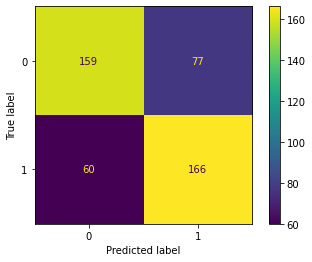

In [60]:
cm = confusion_matrix(y_test, y_pred) # calculate

cm_display = ConfusionMatrixDisplay(cm).plot() # visualize

In [61]:
# Calculate precision, recall and f1 score
precision = precision_score(y_test, y_pred)
print(f'precision = {precision}')
recall = recall_score(y_test, y_pred)
print(f'recall = {recall}')
f1 = f1_score(y_test, y_pred)
print(f'f1 = {f1}')

precision = 0.6831275720164609
recall = 0.7345132743362832
f1 = 0.7078891257995736


### Fit the transformed x and y values into Decision Trees Model

In [62]:
# Initialize Decision Tree
dt = DecisionTreeClassifier()
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus)
# Fit X_train and y_train
dt.fit(X_train, y_train)
# Use model to predict X_test
y_pred = dt.predict(X_test)
# Compare predictions to y_test
accuracy_score(y_test, y_pred)

DecisionTreeClassifier()

0.7316017316017316

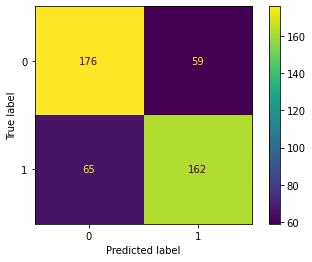

In [63]:
cm = confusion_matrix(y_test, y_pred) # calculate

cm_display = ConfusionMatrixDisplay(cm).plot() # visualize

In [64]:
# Calculate precision, recall and f1 score
precision = precision_score(y_test, y_pred)
print(f'precision = {precision}')
recall = recall_score(y_test, y_pred)
print(f'recall = {recall}')
f1 = f1_score(y_test, y_pred)
print(f'f1 = {f1}')

precision = 0.7330316742081447
recall = 0.7136563876651982
f1 = 0.7232142857142858


### Precision, Recall and F1 scores: Comparison of the three models

In [65]:
# Train test split for transformed X and y
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus)

# Fit Logistic Regression, K Nearest Neighbors,, Decision Trees models
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Use models to predict X_test
y_pred1 = lr.predict(X_test)
y_pred2 = knn.predict(X_test)
y_pred3 = dt.predict(X_test)

# Calculate precision score
precision1 = precision_score(y_test, y_pred1)
precision2 = precision_score(y_test, y_pred2)
precision3 = precision_score(y_test, y_pred3)
print(f'precision of Logistic Regression = {precision1}', f'precision of K Nearest Neighbors = {precision2}', f'precision of Decision Trees = {precision3}' )
print("")

# Calculate recall score
recall1 = recall_score(y_test, y_pred1)
recall2 = recall_score(y_test, y_pred2)
recall3 = recall_score(y_test, y_pred3)
print(f'recall of Logistic Regression = {recall1}', f'recall of K Nearest Neighbors = {recall2}', f'recall of Decision Trees = {recall3}' )
print("")

# Calculate f1 score
f1_1 = f1_score(y_test, y_pred1)
f1_2 = f1_score(y_test, y_pred2)
f1_3 = f1_score(y_test, y_pred3)
print(f'F1 score of Logistic Regression = {f1_1}', f'F1 score of K Nearest Neighbors = {f1_2}', f'F1 score of Decision Trees = {f1_3}' )
print("")


LogisticRegression()

KNeighborsClassifier()

DecisionTreeClassifier()

precision of Logistic Regression = 0.6942446043165468 precision of K Nearest Neighbors = 0.6857142857142857 precision of Decision Trees = 0.7128712871287128

recall of Logistic Regression = 0.8354978354978355 recall of K Nearest Neighbors = 0.7272727272727273 recall of Decision Trees = 0.6233766233766234

F1 score of Logistic Regression = 0.7583497053045186 F1 score of K Nearest Neighbors = 0.7058823529411764 F1 score of Decision Trees = 0.6651270207852193



In this context, the cost of false negatives is too high, ie, if many of the insurance cases are actually frauds, but, they are registered as not frauds, the insurance company will lose money. Hence, the higher the recall score, the better. Logistic Regression model in this instance, is the best amongst the three models as it has the highest recall score.

LogisticRegression()

KNeighborsClassifier()

DecisionTreeClassifier()

Text(0.5, 1.0, 'ROC curve')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive rate')

Logistic Regression is 0.7814321320814828 K Nearest Neigbors is 0.761736099398437 Decision Trees is 0.6818181818181818


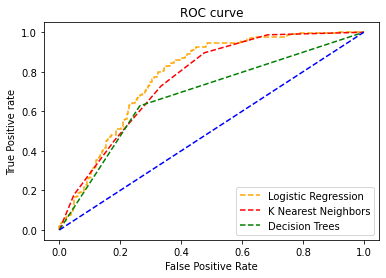

In [66]:
# Fit Logistic Regression, K Nearest Neighbors,, Decision Trees models
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Predict probabilities
pred_prob1 = lr.predict_proba(X_test)
pred_prob2 = knn.predict_proba(X_test)
pred_prob3 = dt.predict_proba(X_test)

# Roc curve for the models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# Roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# Plotting graph 
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='K Nearest Neighbors')
plt.plot(fpr3, tpr3, linestyle='--',color='green', label='Decision Trees')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.legend()
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])

print(f'Logistic Regression is {auc_score1}', f'K Nearest Neigbors is {auc_score2}', f'Decision Trees is {auc_score3}')

The Logistic Regression model has the highest AUC score amongst the three models. What happens if I hypertune this model?

## Hyperparameters Tuning of Logistic Regression model using Grid Search

In [67]:
# Import libraries

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [68]:
# Create the parameters list we wish to tune.
parameters = {
    'penalty':['l1', 'l2'], 
    'C' : np.logspace(-3,3,7), 
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Make a accuracy scoring object.
from sklearn.metrics import accuracy_score
scorer = make_scorer(accuracy_score)

# Perform grid search on the classifier using 'scorer' as the scoring method.
# Create the object.
logreg = LogisticRegression()
clf = GridSearchCV(logreg, param_grid = parameters, scoring='accuracy', cv=10) 

# Fit the grid search object to the training data and find the optimal parameters.
# Fit the data
clf.fit(X_train, y_train)

# View results of GridSearchCV in DataFrame
pd.concat([pd.DataFrame(clf.cv_results_["params"]),   
           pd.DataFrame(clf.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).head()

# Best parameters
clf.best_params_

# Best accuracy
clf.best_score_

#Best estimator
clf.best_estimator_

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

,C,penalty,solver,Accuracy
0,0.001,l1,newton-cg,NaN
1,0.001,l1,lbfgs,NaN
2,0.001,l1,liblinear,0.5
3,0.001,l1,sag,NaN
4,0.001,l1,saga,0.5


{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

0.7312532582629548

LogisticRegression(penalty='l1', solver='liblinear')

In [69]:
# Calculate recall score

y_pred = clf.predict(X_test)
recall_score(y_test, y_pred)

0.8614718614718615

In [70]:
# Calculate AUC score

pred_prob = clf.predict_proba(X_test)
roc_auc_score(y_test, pred_prob[:,1])

0.7905773879799853

## Implementing the model

In [71]:
import statsmodels.api as sm
logit_model = sm.Logit(y_rus, X_rus)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.524405
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.243      
Dependent Variable: FraudFound       AIC:              1994.1040  
Date:               2022-09-05 17:58 BIC:              2154.2065  
No. Observations:   1846             Log-Likelihood:   -968.05    
Df Model:           28               LL-Null:          -1279.5    
Df Residuals:       1817             LLR p-value:      2.2770e-113
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
---------------------------------------------------------------------
       Coef.     Std.Err.       z        P>|z|      [0.025     0.975]
---------------------------------------------------------------------
0      0.1533      0.3327      0.4609    0.6449    -0.4988     0.8055
1     -0.2160      0.1765     -1.2241    

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15419 entries, 0 to 15419
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15419 non-null  int64  
 1   WeekOfMonth           15419 non-null  int64  
 2   DayOfWeek             15419 non-null  int64  
 3   Make                  15419 non-null  int64  
 4   AccidentArea          15419 non-null  int64  
 5   DayOfWeekClaimed      15419 non-null  float64
 6   MonthClaimed          15419 non-null  float64
 7   WeekOfMonthClaimed    15419 non-null  int64  
 8   Sex                   15419 non-null  int64  
 9   MaritalStatus         15419 non-null  int64  
 10  Fault                 15419 non-null  int64  
 11  PolicyType            15419 non-null  int64  
 12  VehicleCategory       15419 non-null  int64  
 13  VehiclePrice          15419 non-null  int64  
 14  Deductible            15419 non-null  int64  
 15  DriverRating       

'Sex', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days:Policy-Accident', 'Days:Policy-Claim', 'AddressChange-Claim', 'BasePolicy' are predictive variables in the model.